In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The data 

In [2]:
DATA_DIR = '/Users/fletchercollis/Desktop/Machine learning for behavioral data/PROJECT_GoGYMi/GoGymi' ### put your path here

activity = pd.read_csv('{}/activity.csv'.format(DATA_DIR))


students = pd.read_csv('{}/students.csv'.format(DATA_DIR))
teachers = pd.read_csv('{}/teachers.csv'.format(DATA_DIR))


gymitrainer = pd.read_csv('{}/gymitrainer.csv'.format(DATA_DIR))


math_questions = pd.read_csv('{}/math_questions.csv'.format(DATA_DIR)) ### NOT USEFUL HERE YET SO NOT LOOKED AT OR CLEANED
text_questions = pd.read_csv('{}/text_questions.csv'.format(DATA_DIR)) ### NOT USEFUL HERE YET SO NOT LOOKED AT OR CLEANED
texts = pd.read_csv('{}/texts.csv'.format(DATA_DIR)) ### NOT USEFUL HERE YET SO NOT LOOKED AT OR CLEANED


math_results = pd.read_csv('{}/math_results.csv'.format(DATA_DIR))
essay_results = pd.read_csv('{}/essay_results.csv'.format(DATA_DIR))
text_results = pd.read_csv('{}/text_results.csv'.format(DATA_DIR))

all_scores = pd.read_csv('{}/all_scores.csv'.format(DATA_DIR))

## First, lets clean up the time in every dataframe to make it easier to manipulate!

In [3]:
activity['activity_started'] = pd.to_datetime(activity['activity_started'], unit='s')
activity['activity_completed'] = pd.to_datetime(activity['activity_completed'], unit='s')
activity['activity_updated'] = pd.to_datetime(activity['activity_updated'], unit='s')

students['creation_time'] = pd.to_datetime(students['creation_time'], unit='s')
teachers['creation_time'] = pd.to_datetime(teachers['creation_time'], unit='s')

gymitrainer['start_time'] = pd.to_datetime(gymitrainer['startTime'], unit='s')
gymitrainer['end_time'] = pd.to_datetime(gymitrainer['endTime'], unit='s')

math_results['time'] = pd.to_datetime(math_results['time'], unit='s')
essay_results['time'] = pd.to_datetime(essay_results['time'], unit='s')
text_results['time'] = pd.to_datetime(text_results['time'], unit='s')

all_scores['time'] = pd.to_datetime(all_scores['time'], unit='s')

## Cleaning the user data

In [4]:
activity.isnull().sum().reset_index(name='Nb of NAN')

,index,Nb of NAN
0,Unnamed: 0,0
1,activity_id,0
2,user_id,0
3,post_id,0
4,course_id,0
5,activity_type,0
6,activity_status,0
7,activity_started,0
8,activity_completed,26293
9,activity_updated,0


In [5]:
activity.loc[:, 'activity_completed'] = activity['activity_completed'].fillna(activity['activity_updated'])  ### Only column where we have NAN and so we replace them with the last updated time 

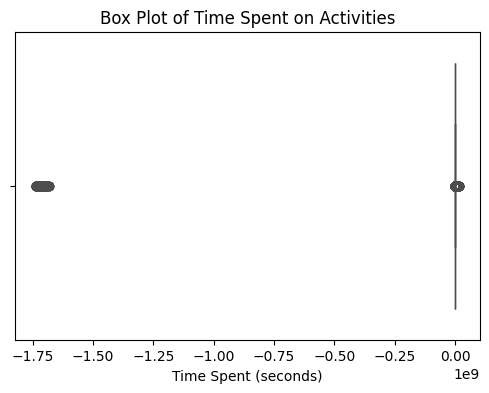

In [7]:
activity['time_spent'] = (activity['activity_completed'] - activity['activity_started']).dt.total_seconds()


plt.figure(figsize=(6, 4))
sns.boxplot(x=activity['time_spent'], color='blue')
plt.xlabel('Time Spent (seconds)')
plt.title('Box Plot of Time Spent on Activities')
plt.show()

## Cleaning the test data

Here we clean the following dataframes :

- all_scores

### Trying stuff 

In [ ]:
# Convert the 'activity_started' and 'activity_completed' columns to datetime
activity['readable_date_started'] = pd.to_datetime(activity['activity_started'], unit='s')
activity['readable_date_ended'] = pd.to_datetime(activity['activity_completed'], unit='s')

# Calculate the time spent by subtracting the start time from the end time
activity['time_spent'] = activity['readable_date_ended'] - activity['readable_date_started']

# If you want a human-readable format for the start and end times, you can convert them to strings as you did before
activity['readable_date_started'] = activity['readable_date_started'].dt.strftime('%Y-%m-%d %H:%M:%S')
activity['readable_date_ended'] = activity['readable_date_ended'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the resulting dataframe
activity


In [ ]:
activity['readable_date_started'] = pd.to_datetime(activity['activity_started'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
activity['readable_date_ended'] = pd.to_datetime(activity['activity_completed'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
#activity['readable_date_updated'] = pd.to_datetime(activity['activity_updated'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
activity['time_spent'] = activity['readable_date_ended'] - activity['readable_date_started']
activity

In [ ]:
all_scores['readable_date'] = pd.to_datetime(all_scores['time'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')

all_scores

In [ ]:
# Convert 'activity_started' to a human-readable date (same as you did earlier)
activity['readable_date_started'] = pd.to_datetime(activity['activity_started'], unit='s').dt.strftime('%Y-%m-%d')

# Group by 'user_id' and count the number of unique days each user has worked on (unique dates)
user_activity_days = activity.groupby('user_id')['readable_date_started'].nunique().reset_index()

# Rename the column to 'days_active' which is the number of unique days each user has been active
user_activity_days = user_activity_days.rename(columns={'readable_date_started': 'days_active'})

# Now, let's count how many users worked for exactly 1 day, 2 days, 3 days, etc.
activity_distribution = user_activity_days['days_active'].value_counts().sort_index().reset_index()

# Rename the columns for clarity
activity_distribution = activity_distribution.rename(columns={'index': 'days_active', 'days_active': 'user_count'})

# Display the resulting DataFrame
activity_distribution
